In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\

1.14.0


C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site

In [2]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!') 
# tensorflow에는 변수가 3개 constant, variables, placeholder
sess = tf.Session()
print(sess.run(hello)) # numpy데이터로 변경
print(hello) # tensorflow의 데이터는 직접 확인이 불가

b'Hello, TensorFlow!'
Tensor("Const:0", shape=(), dtype=string)


In [3]:
# 
x=tf.constant(35,name='x') # model의 그래프 구조 확인
                           # model을 그대로 저장( 가중치 )할 때 메모리 위치를 확인하기 위해서
y=tf.Variable(x+5,name='y') # 변수가 있는 경우 - 반드시 초기화

print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [4]:
model=tf.global_variables_initializer() # 변수초기화 시켜주는 것
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [5]:
# 팬다스에서 데이터 초기화 ( list, dict ) # 요소끼리 계산( 배열연산 )
a = tf.constant([1,2,3],name='a') # GPU 공간
b = tf.constant([4,5,6],name='b')
add_op = a+b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [6]:
# 주입변수
# 자료구조 : Garph로 구성 - 골격(구조) 형성
a = tf.placeholder(tf.int16) # 데이터 없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add,mul)

In [8]:
with tf.Session() as sess:
#     print("feed 변수 합: %i" %sess.run(add, # 데이터 주입 호출 
#                                     feed_dict={a:2,b:3}))
#     print("feed 변수 곱: %i" %sess.run(mul, feed_dict={a:2,b:3}))
    print("feed 변수 곱: %i" %sess.run(total, feed_dict={a:2, b:3}))

feed 변수 곱: 30


In [9]:
matrix1 = tf.constant([[3.,3.]]) # 1X2
matrix2 = tf.constant([[2.],[2.]]) # 2X1 => 1X1
product = tf.matmul(matrix1,matrix2) # matrix multiply

with tf.Session() as sess: # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


In [10]:
zeros = tf.zeros([2,2]) # 0,
ondes = tf.ones([6]) # 1
#균등분포
uniform = tf.random_uniform([3,3,3],minval=0.0,maxval=10)
# 정규분포
normal = tf.random_normal([3,3,3],mean=0.0,stddev=2.0)
# 표준편차 2배내의 것으로 초기화
trunc = tf.truncated_normal([2,2],mean=5.0,stddev=1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
print(sess.run(trunc))
sess.run(init)
print("변수초기화",sess.run(random_var))

[[4.8488183 5.3030415]
 [5.142726  4.799284 ]]
변수초기화 [[-0.258737   -0.6320963 ]
 [-0.28963888  0.01395092]]


In [16]:
import tensorflow as tf
my_tensor = tf.constant(0,shape=[6,2]) # 6X2행렬 => 상수화 되서 저장
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # clas
print(my_static_shape) # 내용은  run으로 차수는 get_shape 함수
my_tensor_transpesed = tf.transpose(my_tensor) # 전치행렬 2X6으로
print(my_tensor_transpesed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [20]:
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval()) # run

[0. 0.]


In [32]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # chaining
    print(t.eval())
    sess.close()

In [36]:
c2, c3 = tf.constant([1.2,5.6]), tf.constant([-4,-1,7])
v2, v3 = tf.constant([2.3,4.5]), tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3])) # 여러개가 가능하도록

[ 3.5 10.1]
[-8  5 17]


2x + y + z =1

4x + 3y + 4z = 2

-4x + 2y + 2z = 2

# A dot x = [1,2,-6] # 행렬 나누기 => 역행렬
           y
           z
              
# 3X3 3X1 => 3X1

In [38]:
sess=tf.Session()
x = tf.constant([2.0,1.0,1.0,4,3,4,-4,2,2],shape=[3,3])
print(sess.run(x))
y = tf.constant([1.0,2,-6],shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [39]:
z = tf.matrix_solve(x,y)
result = sess.run(z)
print("계수:", result)
print(sess.run(z))
# 1
# -2
# 1
# 2*1 + (-2) + 1

계수: [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [41]:
print(2.0 * result[0] + 1.0*result[1] + 1.0*result[2])
print(sess.run(tf.matmul(x,z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [43]:
# matrix_solve(x,y) => (역행렬을 구하고, 곱해주는 아이)
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1,y)
print("해: ",sess.run(z))

해:  [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [46]:
# 특이행렬분해 (singular value decomposition) : 행열이 다를때
# PCA 할 때 - 고유값분해 eigenvalue + eigenvector : 정방행렬
a = tf.constant([1,2,3,4,5,6],shape=[2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑음
# 정방행렬
# truncate : 
s, u, v = tf.svd(a) # singula value, u(2x2)-정방, s(1x2)-연결시켜주는것, v(3x2)-정방
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))

[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [47]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 - one-hot-encoding 할 때 많이 사용
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [48]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia))) # 대각요소의 합계

[1 2 3 4]
10


In [49]:
import numpy as np
a = tf.constant([1,2,3,4,5,6],shape=[2,3])
b = tf.constant([7,8,9,10,11,12],shape=[3,2])
c = tf.matmul(a,b) 
sess.run(c) # 2x2

array([[ 58,  64],
       [139, 154]])

In [51]:
# 행열: 행과 열을 확인하고 앞의 것은 개수 어떻게 층을 이루고 있는가를 보여줌
# 뒤에 두개 만 보면된다.[ ,2,3]
a = tf.constant(np.arange(1,13,dtype=np.int32),shape=[2,2,3]) # 행열을 중심하고 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(13,25,dtype=np.int32),shape=[2,3,2])
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c) # 2x2x2

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [ ]:
# 4차원 행렬곱

In [54]:
a = tf.constant(np.arange(1,25,dtype=np.int32),shape=[2,2,2,3]) # 행열을 중심하고 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(25,49,dtype=np.int32),shape=[2,2,3,2])
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c) # 2x2 => 4개

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [57]:
# a를 제곱한다면 : 자기자신을 제곱하려면
# 뒤에 두개만 바꾸면 된다.
d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a,a,transpose_b = True) # 전치해서 자기 제곱을 하라 ( 다차원 행렬 일때 )

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_9:0' shape=(2, 2, 2, 2) dtype=int32>

In [63]:
                            # 0 1 2   
x  = tf.constant([[[1,2,3], # 2x2x3 = > 제곱이 되려면 2x3x2
                  [4,5,6]],
                 [[7,8,9],
                 [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3x2x2 : # 디폴트 2 1 0 ( 열, 행, 면 )

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [65]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [73]:
t = [1,2,3,4,5,6]
# 6차원으로 변환
t = tf.reshape(t, [1,2,1,3,1,1]) # 묶고,두덩이,묶고,면,열,행
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [74]:
print("t의 차원은 ",sess.run(tf.shape(t)))

t의 차원은  [1 2 1 3 1 1]


In [75]:
print("차원의 수를 축소할 때 ",sess.run(tf.shape(tf.squeeze(t)))) # 요소가 1인 것을 다 없앰

차원의 수를 축소할 때  [2 3]


In [76]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor,[2,-1]))) # -1 : 계산해서 채워라
tf.reshape(tensor,[-1,6])
print(sess.run(tf.reshape(tensor, [2,-1,3])))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [77]:
# t: (1,) 1,2,1,3,1,1 # 1하나가 앞에 새로 생김
print(tf.expand_dims(t,0)) # 차원 확대

Tensor("ExpandDims_1:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [79]:
# padding 충전재
t = [[1,2,3],[4,5,6]] # 2x3 => 4x7
paddings = [[1,1],[2,2]] # 행을 위에 한줄 밑에 한줄, 열을 왼쪽 2줄 오른쪽 2줄
print(sess.run(tf.pad(t, paddings, "CONSTANT"))) # "CONSTANT": 0으로?

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [80]:
# 수를 채우는 방법
paddings = [[1,1],[1,1]] # 4x5
print(sess.run(tf.pad(t,paddings, "REFLECT"))) # "REFLECT": 기존숫자들을 반사해서

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [82]:
 print(sess.run(tf.pad(t, paddings, "SYMMETRIC"))) # "SYMMETRIC" : 확장된는 것

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


# 다차 방정식의 해
- 무작위 대입법
- 역행렬을 구함 
- 입출력 데이터만 : 계수결정 ( 가중치 학습을 통해서 학습 )

In [83]:
# 데이터로부터 규칙을 발견 -> 왜? 분류와 예측을 하기 위해서.
import numpy as np
import tensorflow as tf
# 데이터 생성 => minibatch => feeding
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 # 선형방정식
len(y_data)

100

In [84]:
# 가중치와 바이어스
# 설명력
# bias는 activation 1
# 가중치에는 꼭 바이어스가 한개씩 결합
W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y = W*x_data + b # 예측 # 가중치 * data + 바이어스

In [85]:
# loss function : mse - 2차원인 경우 포물선을 이루고 최적점은 한개
loss = tf.reduce_mean(tf.square(y - y_data)) # y : 예측치, y_data : 실제값
# 경사하강법
# 기울기 : 미분을 이용해서 '-' 면 가중치에 차를 더해주고,
#                          '+' 면 다중치에 감하는 연산
optimizer = tf.train.GradientDescentOptimizer(0.5) # learning rate ( 학습율 )
train = optimizer.minimize(loss) # loss를 최적화하라.

In [86]:
init = tf.global_variables_initializer() # session을 실행하기 전에만 호출(초기화) 해주면 된다.
sess.run(init)

In [87]:
for step in range(201) : # 200번 회전
    sess.run(train)
    if step % 20 == 0: # 20 번 마다 출력하라 
        print(step, sess.run(W), sess.run(b)) # 0.1 + 0.3

0 [-0.44273448] [0.6836782]
20 [-0.03550929] [0.36161187]
40 [0.06910295] [0.31404793]
60 [0.09295526] [0.30320305]
80 [0.09839375] [0.30073032]
100 [0.09963378] [0.30016652]
120 [0.09991649] [0.30003798]
140 [0.09998096] [0.30000865]
160 [0.09999566] [0.30000198]
180 [0.09999903] [0.30000046]
200 [0.09999977] [0.3000001]


# 주입변수로

In [91]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y_model = W*x + b

In [92]:
# loss function : mse - 2차원인 경우 포물선을 이루고 최적점은 한개
loss = tf.reduce_mean(tf.square(y_model - y)) # y : 예측치, y_data : 실제값
# 경사하강법
# 기울기 : 미분을 이용해서 '-' 면 가중치에 차를 더해주고,
#                          '+' 면 다중치에 감하는 연산
optimizer = tf.train.GradientDescentOptimizer(0.5) # learning rate ( 학습율 )
train = optimizer.minimize(loss) # loss를 최적화하라.

In [96]:
init = tf.global_variables_initializer() # session을 실행하기 전에만 호출(초기화) 해주면 된다.
sess.run(init)

In [97]:
for step in range(201) : # 200번 회전
    sess.run(train, {x:x_data, y:y_data})
    if step % 20 == 0: # 20 번 마다 출력하라 
        print(step, sess.run(W), sess.run(b)) # 0.1 + 0.3

0 [-0.1877116] [0.537511]
20 [0.02523354] [0.333994]
40 [0.08295273] [0.30775088]
60 [0.09611312] [0.30176726]
80 [0.09911376] [0.30040297]
100 [0.09979793] [0.3000919]
120 [0.09995393] [0.30002096]
140 [0.0999895] [0.30000478]
160 [0.09999762] [0.30000108]
180 [0.09999945] [0.30000025]
200 [0.09999988] [0.30000007]


In [98]:
predicted = sess.run(y_model, {x: [ i for i in range(100)]})

<function matplotlib.pyplot.show(*args, **kw)>

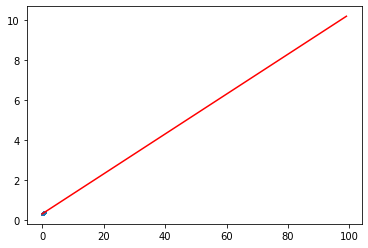

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_data,y_data, 'o', markersize = 2)
plt.plot(predicted, 'r')

plt.show

In [100]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [102]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals : 
    print(sess.run(prod, feed_dict={x_data:x_val, y_data:y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [104]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
    
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/',sess.graph)
# prompt
# tensorboard --logdir=/tmp
# http://localhost:6006/#graphs&run=tensorboard_logs

In [110]:
import numpy
rng = numpy.random

# 상수화할 때 좋은 점 : 수정할 일이 줄어들게 되어지기 때문에
learning_rate = 0.01
training_epochs = 4000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [118]:
# data point : 관측치
# 변수개수
n_samples = train_X.shape[0] # 차수 : 행(3,4) : 인덱스 접근
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight") # 설명
b = tf.Variable(rng.randn(), name="bias") # activation 활성화
activation = tf.add(tf.multiply(X,W),b) # y = ax + b
cost = tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples) # (2*n_samples) : minibatch size를 고려하는 것
# 역전파: optimizer도 hyperparmeter
optimizer = tf.train.GradientDescentOptimizer( # momentum : 고려
    learning_rate).minimize(cost) # hyper parameter
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch:  0001 cost= 1.876531482 W= 0.07170692 b= 0.06977872
Epoch:  0051 cost= 0.103146747 W= 0.34014484 b= 0.15004717
Epoch:  0101 cost= 0.100120448 W= 0.33475935 b= 0.18879032
Epoch:  0151 cost= 0.097443894 W= 0.3296941 b= 0.22522914
Epoch:  0201 cost= 0.095076665 W= 0.3249301 b= 0.25950083
Epoch:  0251 cost= 0.092983037 W= 0.32044944 b= 0.29173437
Epoch:  0301 cost= 0.091131404 W= 0.3162352 b= 0.32205066
Epoch:  0351 cost= 0.089493863 W= 0.3122719 b= 0.35056332
Epoch:  0401 cost= 0.088045612 W= 0.30854407 b= 0.37738097
Epoch:  0451 cost= 0.086764790 W= 0.3050379 b= 0.40260392
Epoch:  0501 cost= 0.085632168 W= 0.3017405 b= 0.42632547
Epoch:  0551 cost= 0.084630474 W= 0.29863912 b= 0.44863695
Epoch:  0601 cost= 0.083744630 W= 0.29572198 b= 0.469622
Epoch:  0651 cost= 0.082961313 W= 0.29297853 b= 0.48935834
Epoch:  0701 cost= 0.082268625 W= 0.2903983 b= 0.5079207
Epoch:  0751 cost= 0.081656098 W= 0.28797138 b= 0.52537924
Epoch:  0801 cost= 0.081114478 W= 0.28568894 b= 0.54179925
Epoch: 

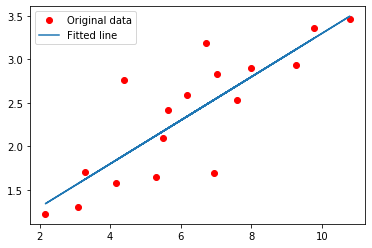

In [119]:
# 그래프 정의 : nod (연산) + edge (데이터 전달: tensor( 배열적 요소 + 행렬적 요소 ))
# 전제조건 : GPU가 존재 => 네트워크로 연결

with tf.Session() as sess: # 실행부
    sess.run(init)
    for epoch in range(training_epochs): # 세대
        for(x,y) in zip(train_X, train_Y): # 데이터를 1개씩 feeding
            sess.run(optimizer, feed_dict={X:x, Y:y})
        # accuracy는 증가함수
        if epoch % display_step == 0: # 비용함수 : 감소 : 우하향
            print("Epoch: ","%04d" % (epoch+1), "cost=","{:.9f}".format(sess.run(cost,feed_dict={X:train_X,Y:train_Y})),
                 "W=",sess.run(W), "b=",sess.run(b)) # 수렴값
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}),
         "W=", sess.run(W), "b=",sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    # predict한 결과값 출력
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b),label='Fitted line')
    plt.legend()
    plt.show()

In [122]:
# tensor -> 직접 시각화하는 것이 불가능 => numpy 포멧으로 변경
import tensorflow as tf

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [126]:
# my_distribution = tf.random_uniform((6,4),seed=42) # 24 # 데이터 수가 너무 적어서 균등분포가 되지 않는다.
my_distribution = tf.random_uniform((600,400),seed=42) # 데이터의 개수에 따라 균등분포를 이루기도 이루지 않기도 한다.
uniform = run_variable(my_distribution)

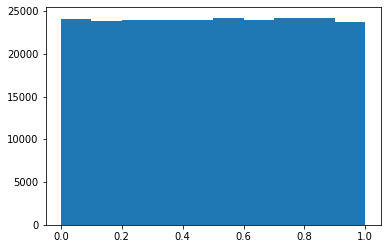

In [127]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 데이터가 메모리 저장 : 1차원
plt.show()

# activation 함수 : 활성화함수 : 회귀냐 분류냐를 결정
- 비선형 매핑 ( 선형대수 -> 비선형문제로 변경 )
- 가중치를 깊게하고 활성화함수 매핑으로 XOR 문제를 해결

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph() # 그래프 초기화를 해줘야함
sess = tf.Session()

x_vals = np.linspace(start=-10, stop = 10, num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[4.53988992e-05 5.55621925e-05 6.80006294e-05 8.32234827e-05
 1.01854002e-04 1.24654915e-04 1.52559623e-04 1.86710374e-04
 2.28504961e-04 2.79653838e-04 3.42249995e-04 4.18854392e-04
 5.12600439e-04 6.27321712e-04 7.67708042e-04 9.39496227e-04
 1.14970295e-03 1.40690911e-03 1.72160671e-03 2.10662180e-03
 2.57762963e-03 3.15378152e-03 3.85846667e-03 4.72023638e-03
 5.77392318e-03 7.06199264e-03 8.63617122e-03 1.05593993e-02
 1.29081631e-02 1.57752639e-02 1.92730804e-02 2.35373794e-02
 2.87317129e-02 3.50524161e-02 4.27341757e-02 5.20560700e-02
 6.33478781e-02 7.69963170e-02 9.34506760e-02 1.13227094e-01
 1.36910472e-01 1.65152775e-01 1.98666320e-01 2.38210660e-01
 2.84571982e-01 3.38534624e-01 4.00845440e-01 4.72173209e-01
 5.53066799e-01 6.43916968e-01 7.44927069e-01 8.56097102e-01
 9.77223714e-01 1.10791615e+00 1.24762553e+00 1.39

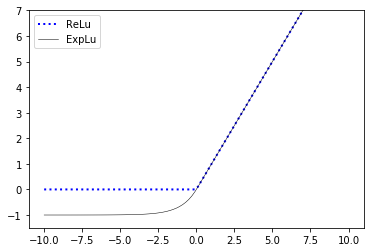

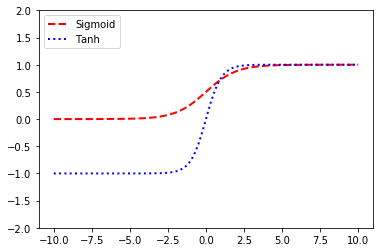

In [129]:
print(sess.run(tf.nn.relu([-3.,3.,10.]))) # 0~oo
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1.,0.,1.]))) #0~1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1.,0.,1.]))) # -1~1
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.elu([-1.,0.,1.])))# -1~oo 수정본
y_elu = sess.run(tf.nn.elu(x_vals))
print(sess.run(tf.nn.softplus([-1.,0.,1.]))) # 각진 단점 보완
y_softplus = sess.run(tf.nn.softplus(x_vals))
print(y_softplus)
print(y_elu)

plt.plot(x_vals, y_relu, 'b:', label='ReLu', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLu', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()
plt.plot(x_vals, y_sigmoid, 'r--', label = 'Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

In [130]:
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
tf.set_random_seed(5) # 시드의 초기값
np.random.seed(42)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500) # 
# 사이즈 fix하지 않고 입력 데이터로 부터 계산
# 행데이터로 생성
# ex) [1,2,3,2,12,2,1,23,21,3]
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [131]:
# y = ax + b (0 ~ 1사이 값으로 mapping)
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
# 0~ oo
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))
# 0.75로 수렴과정
# MSE
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print("\n Sogmoid AND Relu 함수의 최적화 0.75")


 Sogmoid AND Relu 함수의 최적화 0.75


In [132]:
loss_vec_sigmoid = [] # 로스트값을 저장
loss_vec_relu = []

In [139]:
for i in range(500):
    # 500 -> 50
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]]) # 모양을 맞추기 위해
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    sigmoid_output = np.mean(sess.run(sigmoid_activation,feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation,feed_dict={x_data:x_vals})) # relu가 데이터가 조금 적어도 빠르게 0.75에 수렴
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output))+'relu = '+str(np.mean(relu_output)))
# 0.75 수렴하는 과정

sigmoid = 0.74255234relu = 0.7470662
sigmoid = 0.744701relu = 0.74511236
sigmoid = 0.74466586relu = 0.7489267
sigmoid = 0.7458611relu = 0.74801934
sigmoid = 0.7469693relu = 0.7465224
sigmoid = 0.7467104relu = 0.7513894
sigmoid = 0.7482414relu = 0.74684614
sigmoid = 0.748432relu = 0.7467455
sigmoid = 0.7490696relu = 0.7446129
sigmoid = 0.748492relu = 0.74965477


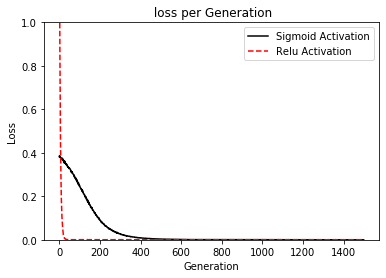

In [140]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 